In [1]:
# Importing libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

In [4]:
# ML Libraries
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [3]:
pip install mlxtend

     ---------------------------------------- 1.3/1.3 MB 4.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
# Setting figure size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

In [6]:
# Get the data
df = pd.read_csv("diabetess.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.shape

(768, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
# replacting 0 with nan
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = \
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1


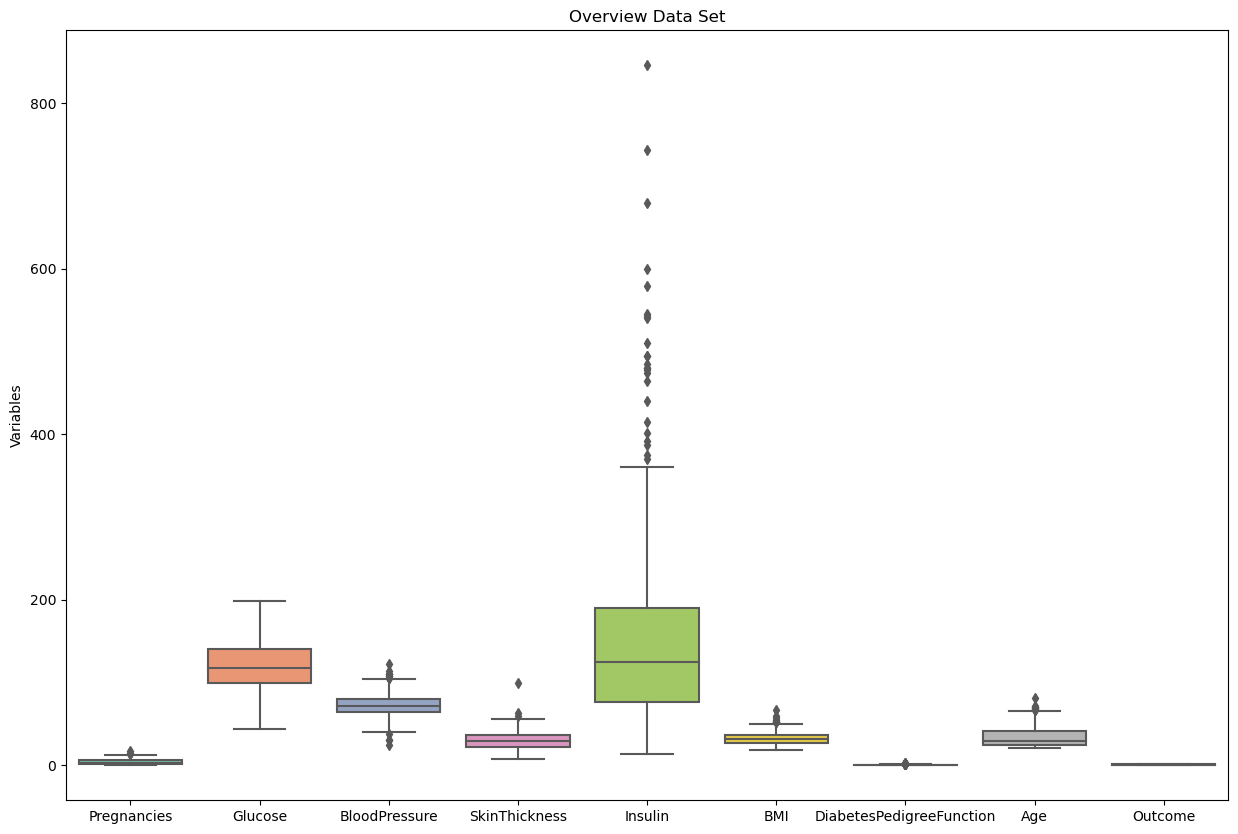

In [11]:
# Distribution of all variables
f, ax= plt.subplots(figsize=(15, 10))

ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = df, orient = 'v', palette = 'Set2')

In [12]:
# Checking for null values
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [13]:
# function to find the mean 
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = round(temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].mean().reset_index(), 1)
    return temp

In [14]:
median_target("Glucose")

,Outcome,Glucose
0,0,110.6
1,1,142.3


In [15]:
df.loc[(df['Outcome'] == 0 ) & (df['Glucose'].isnull()), 'Glucose'] = 110.6
df.loc[(df['Outcome'] == 1 ) & (df['Glucose'].isnull()), 'Glucose'] = 142.3

In [16]:
median_target("BloodPressure")

,Outcome,BloodPressure
0,0,70.9
1,1,75.3


In [17]:
df.loc[(df['Outcome'] == 0 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 70.9
df.loc[(df['Outcome'] == 1 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 75.3

In [18]:
median_target("SkinThickness")

,Outcome,SkinThickness
0,0,27.2
1,1,33.0


In [19]:
df.loc[(df['Outcome'] == 0 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 27.2
df.loc[(df['Outcome'] == 1 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 33.0

In [20]:
median_target("Insulin")

,Outcome,Insulin
0,0,130.3
1,1,206.8


In [21]:
df.loc[(df['Outcome'] == 0 ) & (df['Insulin'].isnull()), 'Insulin'] = 130.3
df.loc[(df['Outcome'] == 1 ) & (df['Insulin'].isnull()), 'Insulin'] = 206.8

In [22]:
median_target("BMI")

,Outcome,BMI
0,0,30.9
1,1,35.4


In [23]:
df.loc[(df['Outcome'] == 0 ) & (df['BMI'].isnull()), 'BMI'] = 30.9
df.loc[(df['Outcome'] == 1 ) & (df['BMI'].isnull()), 'BMI'] = 35.4

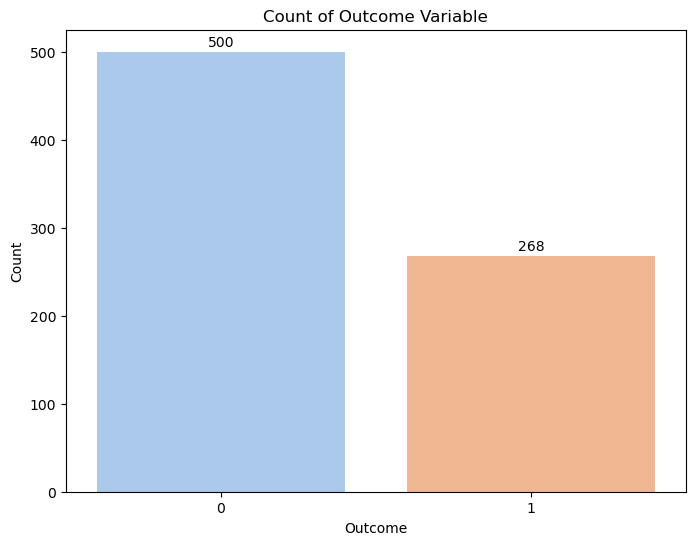

In [24]:
# Disribution of target variable
g = sns.countplot(x='Outcome',data=df, palette='pastel')
plt.title('Count of Outcome Variable')
plt.xlabel('Outcome')
plt.ylabel('Count')

for p in g.patches:
    g.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', \
                   va = 'center', xytext = (0, 7), textcoords = 'offset points')

<AxesSubplot:>

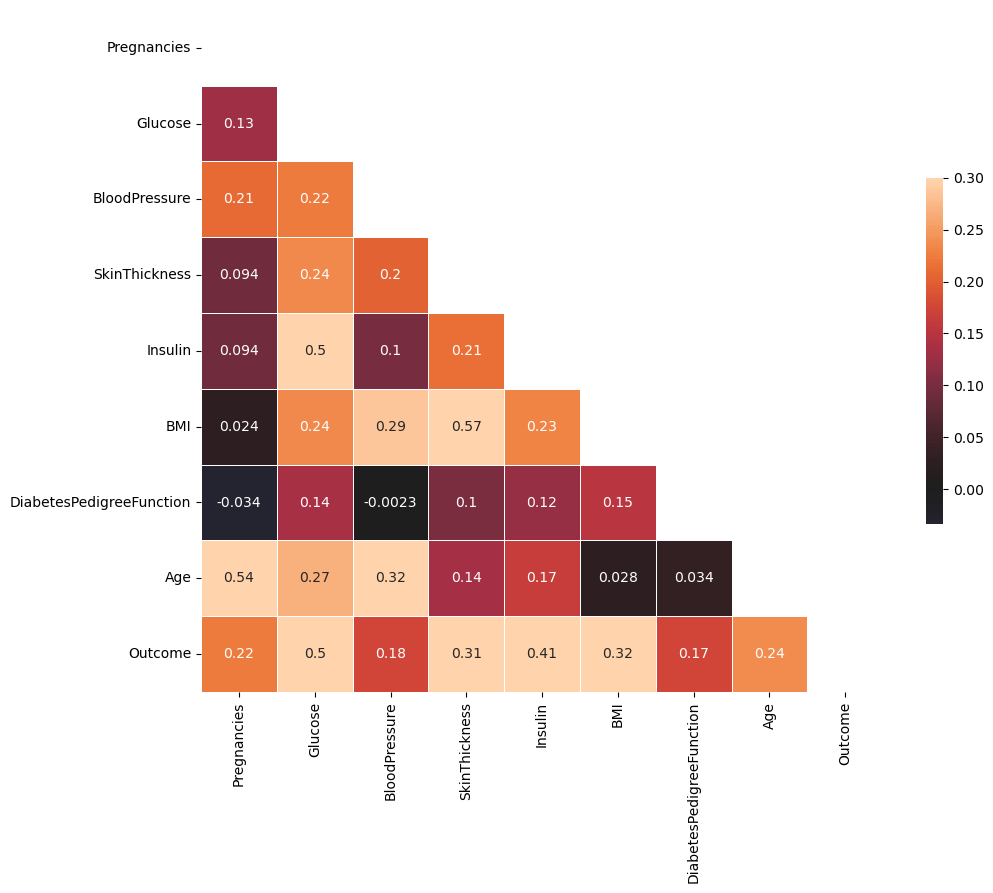

In [25]:
# Correlation plot
f, ax = plt.subplots(figsize=(11, 9))

mask = np.triu(np.ones_like(df.corr(), dtype=bool))

sns.heatmap(df.corr(), mask=mask, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

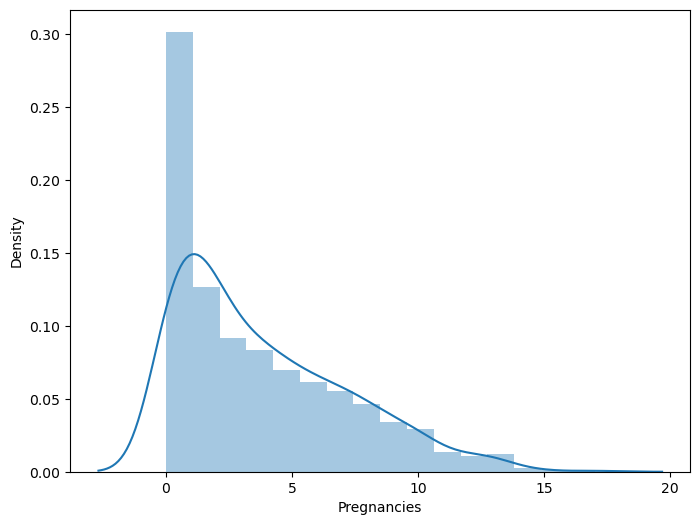

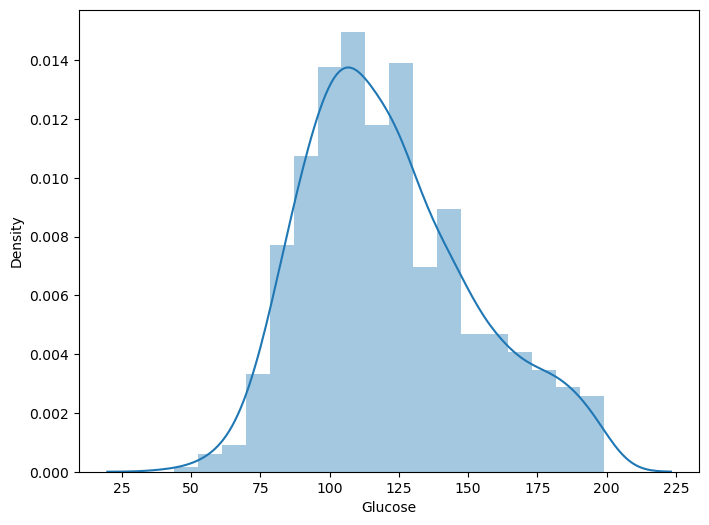

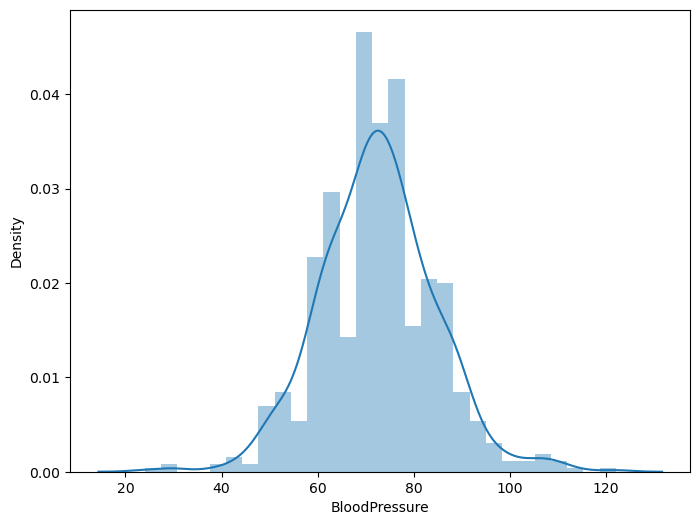

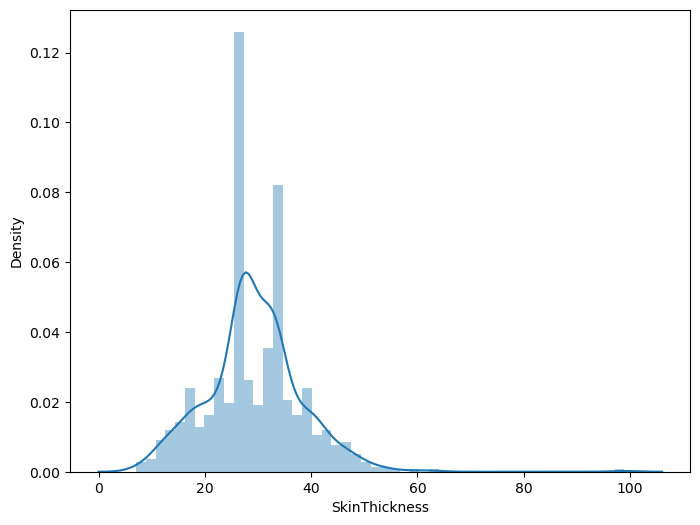

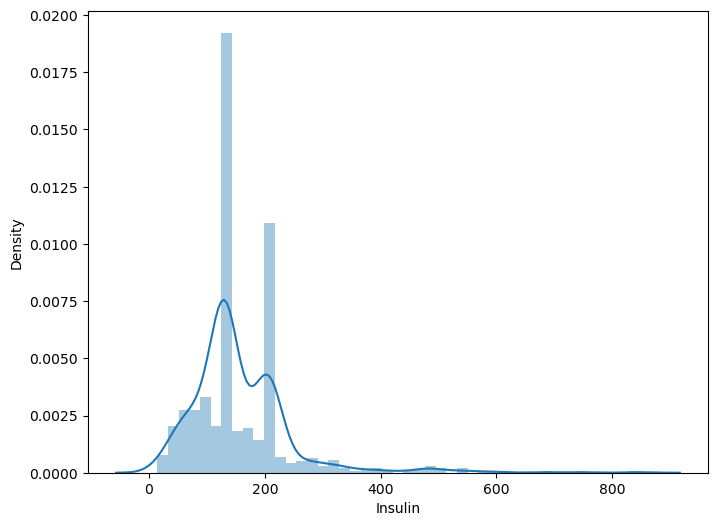

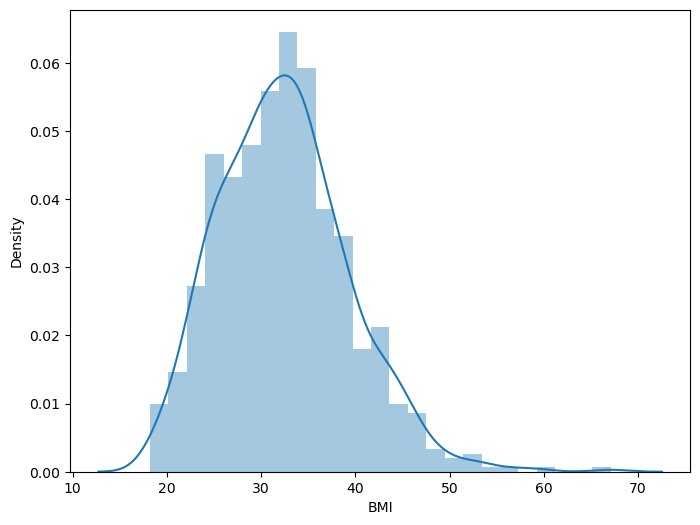

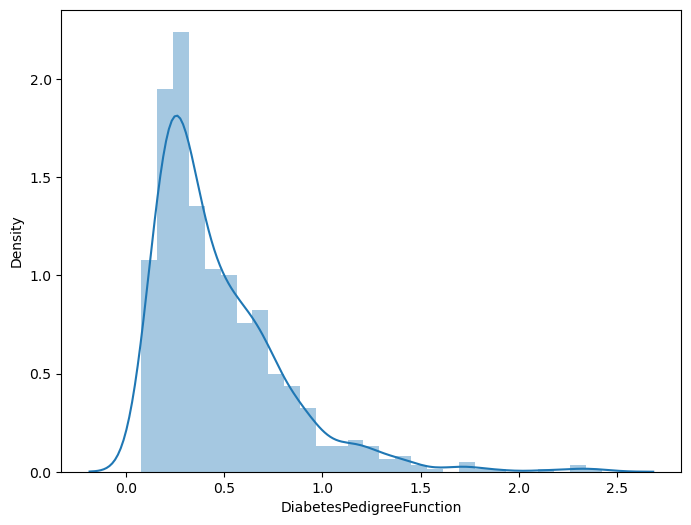

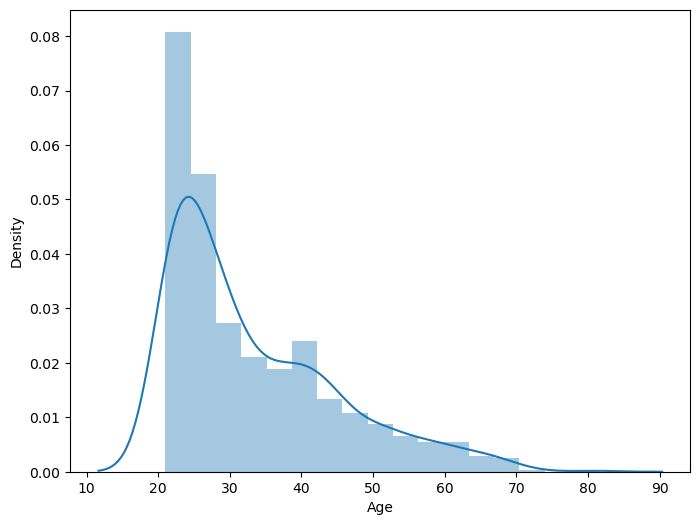

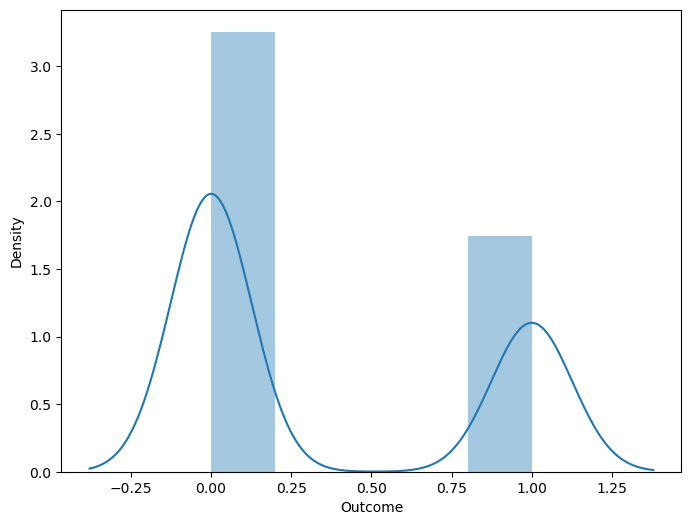

In [26]:
# Distribution plot for each column
for i in df.columns:
    sns.distplot(df[i], hist=True, kde=True)
    plt.show()

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

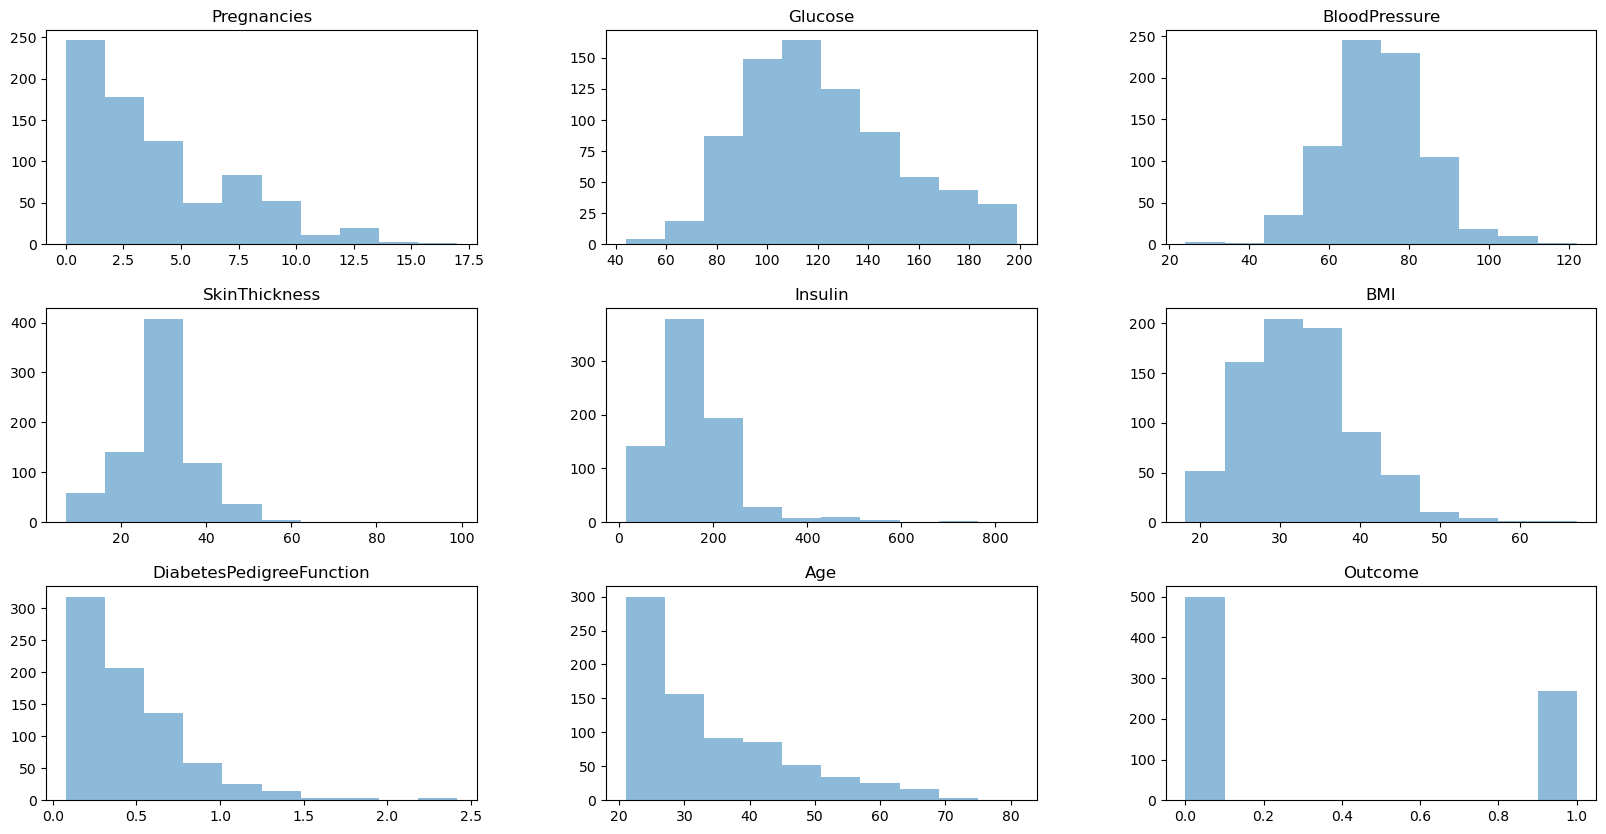

In [27]:
# Histogram for each column
plt.rcParams["figure.figsize"] = (20, 10)
df.hist(grid=False, alpha=0.5)

Text(0.5, 1.0, 'Glucose vs Blood Pressure')

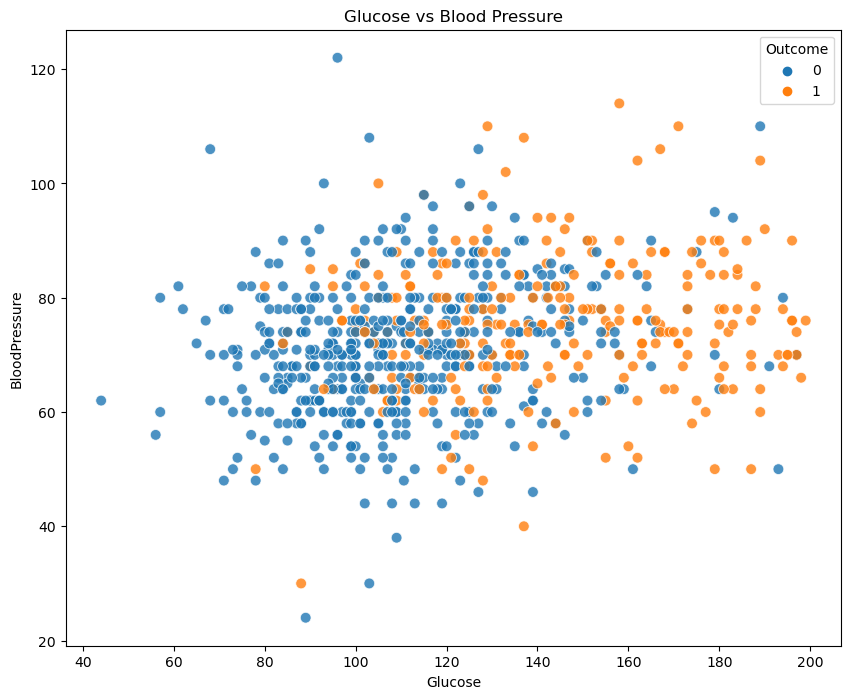

In [28]:
# Glucose vs BP 
plt.rcParams["figure.figsize"] = (10, 8)
sns.scatterplot(x='Glucose', y='BloodPressure', hue='Outcome', data=df, s=60, alpha=0.8)
plt.title('Glucose vs Blood Pressure')

Text(0.5, 1.0, 'Insulin vs Blood Pressure')

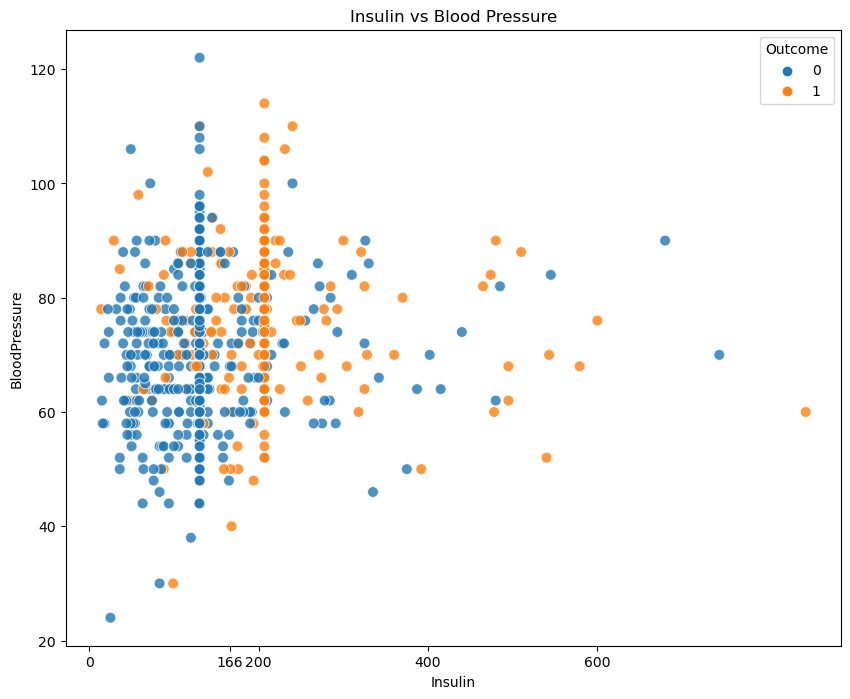

In [29]:
# Insulin vs Blood Pressure 
plt.rcParams["figure.figsize"] = (10, 8)
sns.scatterplot(x='Insulin', y='BloodPressure', hue='Outcome', data=df, s=60, alpha=0.8)
plt.xticks([0, 166, 200, 400, 600])
plt.title('Insulin vs Blood Pressure')

Text(0.5, 1.0, 'Glucose vs Age')

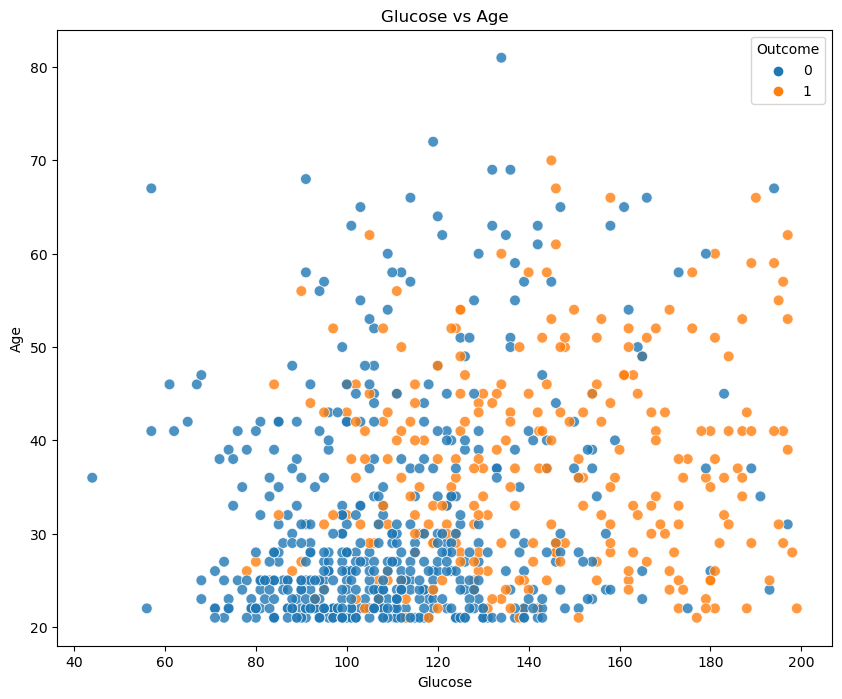

In [30]:
# Glucose vs Age
plt.rcParams["figure.figsize"] = (10, 8)
sns.scatterplot(x='Glucose', y='Age', hue='Outcome', data=df, s=60, alpha=0.8)
plt.title('Glucose vs Age')

Text(0.5, 1.0, 'BMI vs Age')

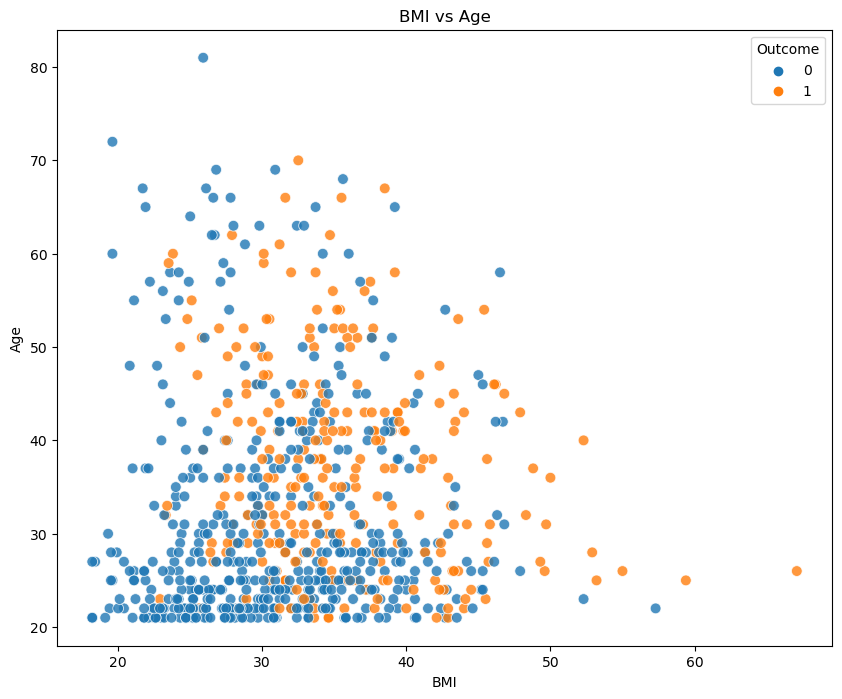

In [31]:
# BMI vs Age
plt.rcParams["figure.figsize"] = (10, 8)
sns.scatterplot(x='BMI', y='Age', hue='Outcome', data=df, s=60, alpha=0.8)
plt.title('BMI vs Age')

Text(0.5, 1.0, 'Skin Thickness vs DPF')

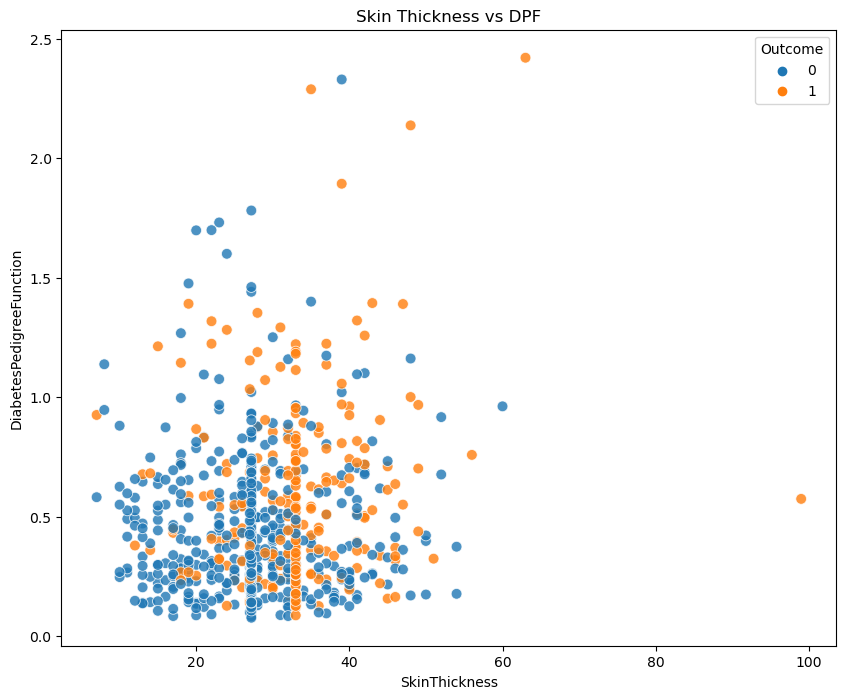

In [32]:
# Skin Thickness vs DPF
plt.rcParams["figure.figsize"] = (10, 8)
sns.scatterplot(x='SkinThickness', y='DiabetesPedigreeFunction', hue='Outcome', data=df, s=60, alpha=0.8)
plt.title('Skin Thickness vs DPF')

In [33]:
# splitting columns
X = df.drop(columns='Outcome')
y = df['Outcome']

In [37]:
#scaling
scaler = StandardScaler()
X =  pd.DataFrame(scaler.fit_transform(X), columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [38]:
# Split the dataset into 70% Training set and 30% Testing set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [39]:
# Function for accessing performance:
def classification_model(y_test, prediction, model, x_train, y_train):
    # accuracy score
    accuracy = metrics.accuracy_score(y_test,prediction)
    print ("Accuracy Score: %s" % "{0:.3%}".format(accuracy))
    # F1 score
    f1 = metrics.f1_score(y_test,prediction)
    print ("F1 Score: %s" % "{0:.3%}".format(f1))



    #cross validation with 5 folds
    kf = KFold(n_splits=5)
    kf.split(x_train)    

    accuracy_model = []
    
    for train_index, test_index in kf.split(x_train):
            # Split train-test
            X_train, X_test = x_train.iloc[train_index], x_train.iloc[test_index]
            Y_train, Y_test = y_train.iloc[train_index], y_train.iloc[test_index]
            # Train the model
            model.fit(X_train, Y_train)
            # Append to accuracy_model the accuracy of the model
            accuracy_model.append(accuracy_score(Y_test, model.predict(X_test)))
    
    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(accuracy_model)))
    
    
# Function for confusion matrix plot
def confusion_matrix_plot (y_test, prediction):
    
    cm = confusion_matrix(y_test, prediction)
    classes = ['0', '1']
    figure, ax = plot_confusion_matrix(conf_mat = cm,
                                       class_names = classes,
                                       show_absolute = True,
                                       show_normed = False,
                                       colorbar = True)

    plt.show()

Accuracy Score: 80.519%
F1 Score: 69.799%
Cross-Validation Score : 77.840%


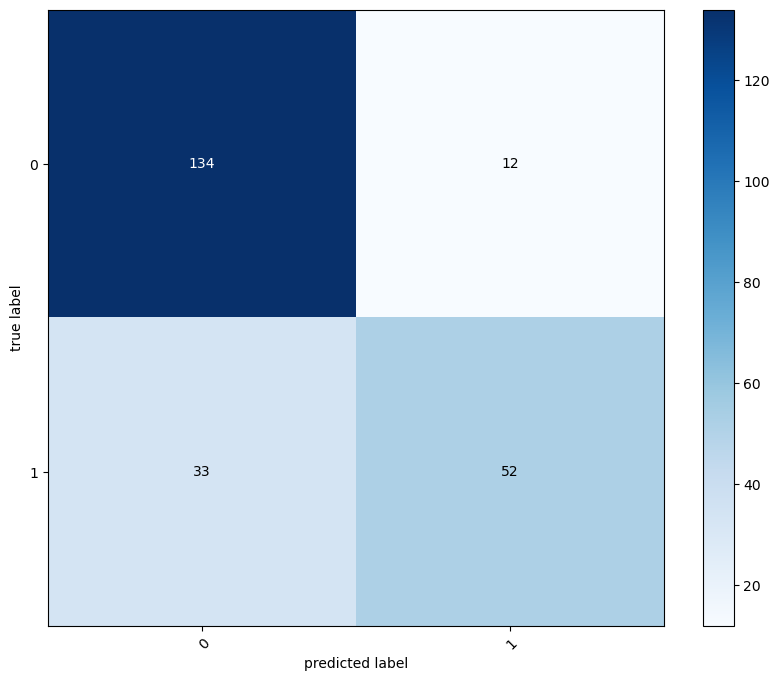

In [40]:
logmodel = LogisticRegression()

logmodel.fit(x_train, y_train)

prediction = logmodel.predict(x_test)

classification_model(y_test, prediction, logmodel, x_train, y_train)
confusion_matrix_plot(y_test, prediction)

Accuracy Score: 82.251%
F1 Score: 76.301%
Cross-Validation Score : 82.510%


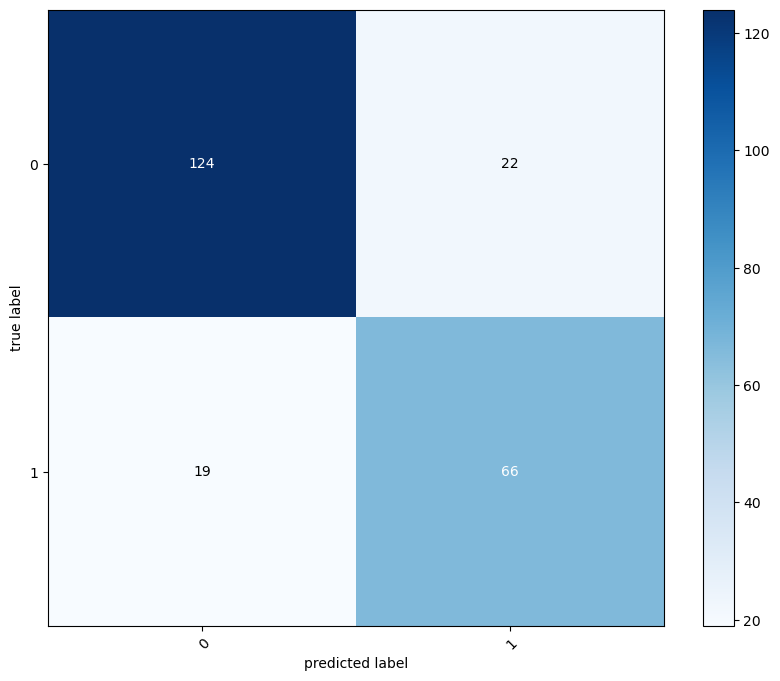

In [41]:
dec_tree = DecisionTreeClassifier()

dec_tree.fit(x_train, y_train)

prediction2 = dec_tree.predict(x_test)

classification_model(y_test, prediction2, dec_tree, x_train, y_train)
confusion_matrix_plot(y_test, prediction2)

Accuracy Score: 89.610%
F1 Score: 85.185%
Cross-Validation Score : 86.601%


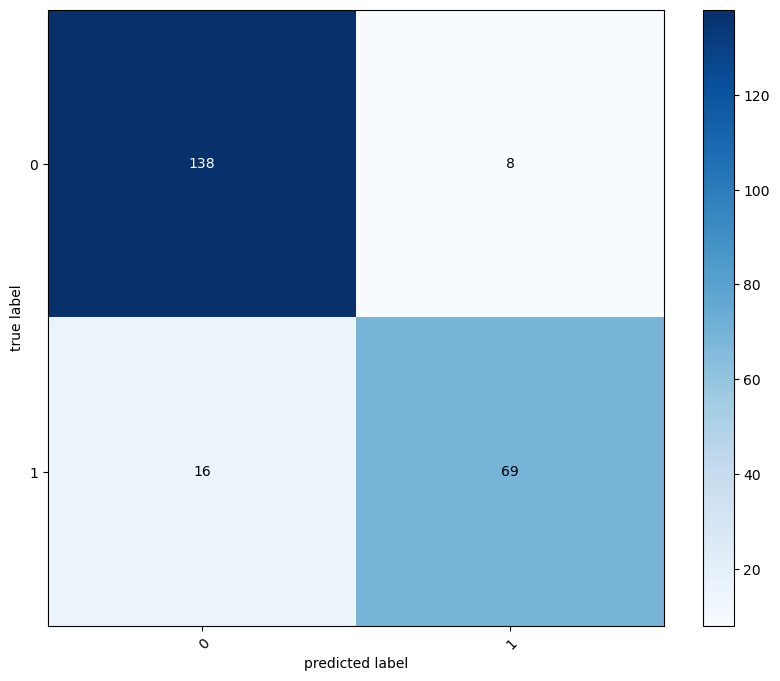

In [42]:
rfmodel = RandomForestClassifier(random_state=1)

rfmodel.fit(x_train, y_train)

prediction3 = rfmodel.predict(x_test)

classification_model(y_test, prediction3, rfmodel, x_train, y_train)
confusion_matrix_plot(y_test, prediction3)

Accuracy Score: 89.610%
F1 Score: 85.714%
Cross-Validation Score : 87.534%


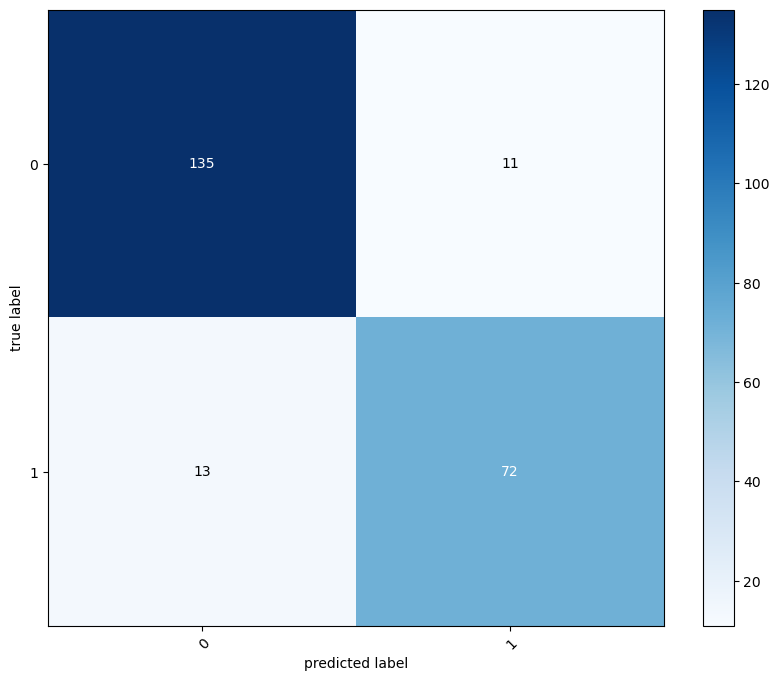

In [43]:
gb = GradientBoostingClassifier()

gb.fit(x_train, y_train)

prediction4 = gb.predict(x_test)

classification_model(y_test, prediction4, gb, x_train, y_train)
confusion_matrix_plot(y_test, prediction4)

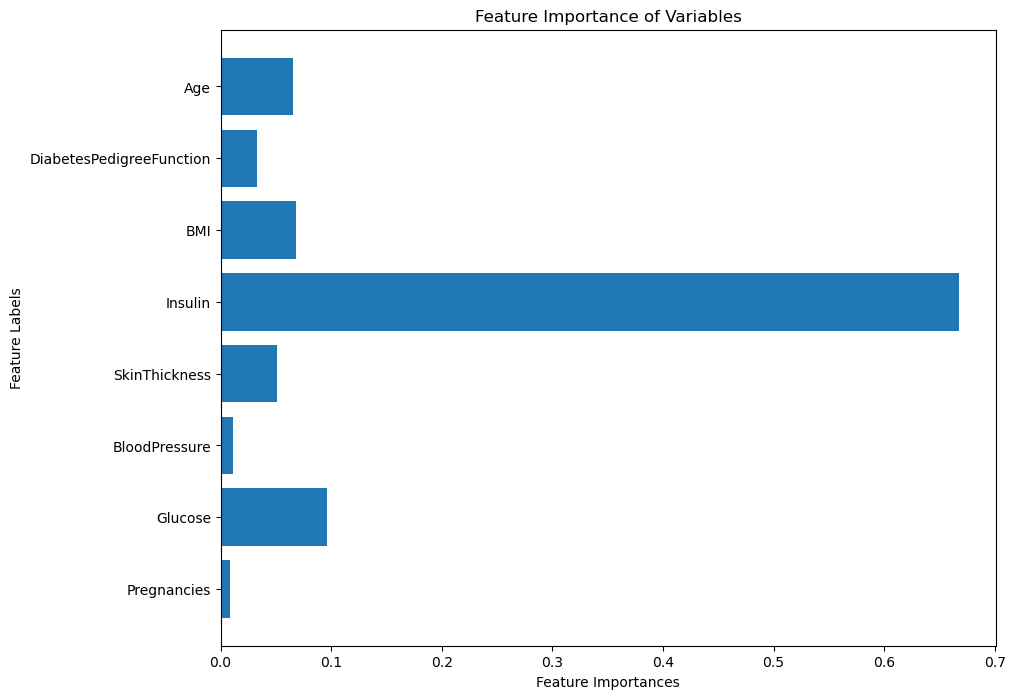

In [44]:
feature_importances = gb.feature_importances_ 

plt.barh(x_train.columns, feature_importances)
plt.xlabel('Feature Importances')
plt.ylabel('Feature Labels')
plt.title('Feature Importance of Variables')
plt.show()

In [45]:
x_tr = x_train.loc[:,['Insulin','Glucose','BMI','Age','SkinThickness']]
x_te = x_test.loc[:,['Insulin','Glucose','BMI','Age','SkinThickness']]

Accuracy Score: 89.610%
F1 Score: 85.882%
Cross-Validation Score : 87.530%


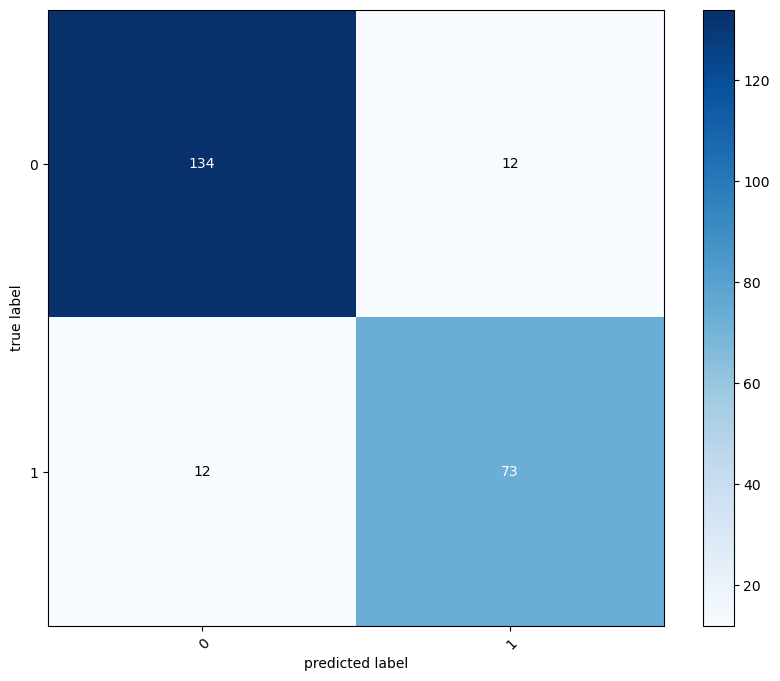

In [46]:
gb2 = GradientBoostingClassifier()

gb2.fit(x_tr, y_train)

prediction5 = gb2.predict(x_te)

classification_model(y_test, prediction5, gb2, x_tr, y_train)
confusion_matrix_plot(y_test, prediction5)

In [47]:
%%writefile diabet.py
import streamlit as st 
import numpy as np 
import pandas as pd 
import streamlit.components.v1 as components

# ML Libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# heading
st.markdown("<h1 style='text-align: center; color: blue;'>DIADETECT</h1>", unsafe_allow_html=True)
st.markdown("<h4 style='text-align: center; color: white;'>...a diabetes detection system</h4><br>", unsafe_allow_html=True)


st.write("Diabetes is a chronic disease that occurs when your blood glucose is too high. This application helps to effectively detect if someone has diabetes using Machine Learning. " )



#Get the data
df = pd.read_csv("diabetes.csv")

# replacting 0 with nan
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)


# replacing missing values

# function to find the mean 
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = round(temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].mean().reset_index(), 1)
    return temp


# Glucose
df.loc[(df['Outcome'] == 0 ) & (df['Glucose'].isnull()), 'Glucose'] = 110.6
df.loc[(df['Outcome'] == 1 ) & (df['Glucose'].isnull()), 'Glucose'] = 142.3

# Blood pressure
df.loc[(df['Outcome'] == 0 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 70.9
df.loc[(df['Outcome'] == 1 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 75.3

# Skin thickness
df.loc[(df['Outcome'] == 0 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 27.2
df.loc[(df['Outcome'] == 1 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 33.0

# Insulin
df.loc[(df['Outcome'] == 0 ) & (df['Insulin'].isnull()), 'Insulin'] = 130.3
df.loc[(df['Outcome'] == 1 ) & (df['Insulin'].isnull()), 'Insulin'] = 206.8

# BMI
df.loc[(df['Outcome'] == 0 ) & (df['BMI'].isnull()), 'BMI'] = 30.9
df.loc[(df['Outcome'] == 1 ) & (df['BMI'].isnull()), 'BMI'] = 35.4



# splitting columns
X = df.drop(columns='Outcome')
y = df['Outcome']


#scaling
scaler = StandardScaler()
X =  pd.DataFrame(scaler.fit_transform(X), columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])


# Split the dataset into 70% Training set and 30% Testing set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

x_tr = x_train.loc[:,['Insulin','Glucose','BMI','Age','SkinThickness']]

name = st.text_input('What is your name?').capitalize()

#Get the feature input from the user
def get_user_input():

    insulin = st.number_input('Enter your insulin 2-Hour serum in mu U/ml')
    glucose = st.number_input('What is your plasma glucose concentration?')
    BMI = st.number_input('What is your Body Mass Index?')
    age = st.number_input('Enter your age')
    skin_thickness = st.number_input('Enter your skin fold thickness in mm')

    
    user_data = {'Insulin': insulin,
                'Glucose': glucose,
                'BMI': BMI,
                'Age': age,
                'Skin Thickness': skin_thickness,
                 }
    features = pd.DataFrame(user_data, index=[0])
    return features
user_input = get_user_input()


bt = st.button('Get Result')

if bt:
    gb = GradientBoostingClassifier(random_state=1)
    gb.fit(x_tr, y_train)
    prediction = gb.predict(user_input)
    

    if prediction == 1:
        st.write(name,", you either have diabetes or are likely to have it. Please visit the doctor as soon as possible.")
        
    else:
        st.write('Hurray!', name, 'You are diabetes FREE.')

Writing diabet.py
